# Sentiment Analysis on Amazon Product Reviews of Mobile Phones

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re

In [2]:
raw_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [3]:
raw_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [5]:
product_name = []
for item in raw_data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

In [6]:
len(product_name) # 4410 phones

4410

In [7]:
raw_data["Brand Name"]
brands = []
for item in raw_data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [8]:
len(brands) # Total Brands in the dataset

385

In [9]:
raw_data_df = pd.DataFrame(raw_data) #converting the data into a pandas dataframe.

In [10]:
raw_data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [11]:
from sklearn.utils import shuffle
raw_data_df = shuffle(raw_data_df) #Shuffle Data

In [12]:
raw_data_df[:10]
raw_data_df = raw_data_df.dropna()

In [13]:
raw_data_df.describe()

,Price,Rating,Review Votes
count,334335.000000,334335.000000,334335.000000
mean,222.585019,3.824888,1.474515
std,283.139353,1.541203,9.217348
min,1.730000,1.000000,0.000000
25%,75.410000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,264.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [14]:
#Creation of pivot to Visualize 
info = pd.pivot_table(raw_data_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)

sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     250452        96057  3.973032     1.523795
BLU         226085        54798  3.821069     0.926143
Apple       220286       112211  3.926597     2.000160
LG           83266        22929  3.848493     1.059762
BlackBerry   61892        21114  3.750121     1.279326
Nokia        61833        25684  3.824879     1.588767
Motorola     49564        23107  3.811736     1.777051
HTC          42873        12777  3.474030     1.035329
CNPGD        38233        20151  3.107869     1.638026
OtterBox     34556         2268  4.385279     0.287817

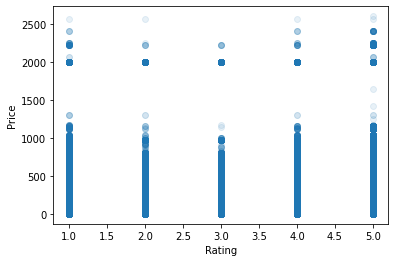

In [15]:
import matplotlib.pyplot as plt
ylabel = raw_data_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = raw_data_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

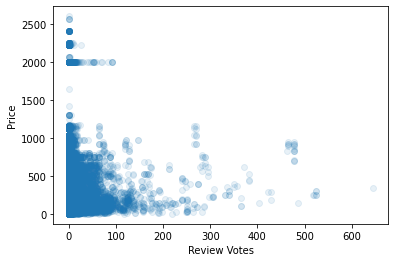

In [16]:
ylabel2 = raw_data_df["Price"]
plt.ylabel("Price")
xlabel2 = raw_data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

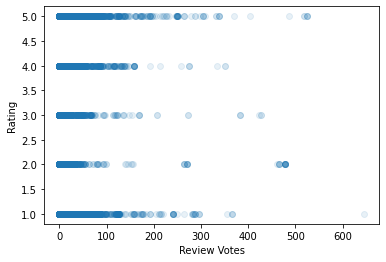

In [17]:
ylabel3 = raw_data_df["Rating"]
plt.ylabel("Rating")
xlabel3 = raw_data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel3, ylabel3, alpha=0.1)
plt.show()

In [18]:
corr_matrix = raw_data_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.073948
Review Votes   -0.046526
Name: Rating, dtype: float64

In [19]:
corr_matrix = raw_data_df.corr()
corr_matrix["Price"].sort_values(ascending = False)


Price           1.000000
Rating          0.073948
Review Votes    0.022164
Name: Price, dtype: float64

In [20]:

all_reviews = raw_data_df["Reviews"]
all_reviews.head()

347464    Love it, not for everyone but I love it, and t...
386457                                                 good
269482    Much more worth it than a $400+ Samsung. Wish ...
47530     It Works good but does not have direction manu...
348584    I love it , I'm a late starter in smart phones...
Name: Reviews, dtype: object

In [21]:
raaw_data_df = raw_data_df.reset_index(drop=True)

In [22]:
raw_data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
347464,Samsung Galaxy S4 Zoom 16MP Camera Android Sma...,Samsung,325.00,5,"Love it, not for everyone but I love it, and t...",2.0
386457,Sanyo Katana LX Black No Contract Sprint Cell ...,Sanyo,254.91,5,good,0.0
269482,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,Nokia,99.95,5,Much more worth it than a $400+ Samsung. Wish ...,0.0
47530,Apple iPhone 5s 64GB (Silver) - T-Mobile,Apple,265.00,3,It Works good but does not have direction manu...,0.0
348584,Samsung Galaxy S5 G900A 16GB Unlocked GSM 4G L...,Samsung,219.00,5,"I love it , I'm a late starter in smart phones...",1.0


In [23]:
all_reviews = raw_data_df['Reviews']
all_sent_values = []
all_sentiments = []

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


In [27]:
sample = raw_data_df['Reviews'][123]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

All around good phone, not glitchy at all, or laggy. There are a fee problems such as the storage being very small (only 2gb) and the camera is very poor quality. I'm pretty certain that you can buy a Galaxy S 4 camera and install it to this phone. But all around this is a pretty great phone!
Sentiment: 
0.9


In [28]:
for i in range(0,20000):
    all_sent_values.append(sentiment_value(all_reviews.iloc[i])) # 8 minutes for calculation


In [29]:
len(all_sent_values)

20000

In [30]:
temp_data = raw_data_df[0:20000]
temp_data.shape

(20000, 6)

In [31]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,20000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [33]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

<ipython-input-33-5846567ce324>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
<ipython-input-33-5846567ce324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['SENTIMENT'] = SENTIMENT


In [34]:
temp_data.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
347464,Samsung Galaxy S4 Zoom 16MP Camera Android Sma...,Samsung,325.00,5,"Love it, not for everyone but I love it, and t...",2.0,5,V.Positive
386457,Sanyo Katana LX Black No Contract Sprint Cell ...,Sanyo,254.91,5,good,0.0,4,Positive
269482,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,Nokia,99.95,5,Much more worth it than a $400+ Samsung. Wish ...,0.0,5,V.Positive
47530,Apple iPhone 5s 64GB (Silver) - T-Mobile,Apple,265.00,3,It Works good but does not have direction manu...,0.0,4,Positive
348584,Samsung Galaxy S5 G900A 16GB Unlocked GSM 4G L...,Samsung,219.00,5,"I love it , I'm a late starter in smart phones...",1.0,5,V.Positive


In [35]:
counter = 0
for i in range(0,20000):
    if (abs(temp_data['Rating'].iloc[i]-temp_data['SENTIMENT_VALUE'].iloc[i])>1):
        counter += 1

In [36]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]

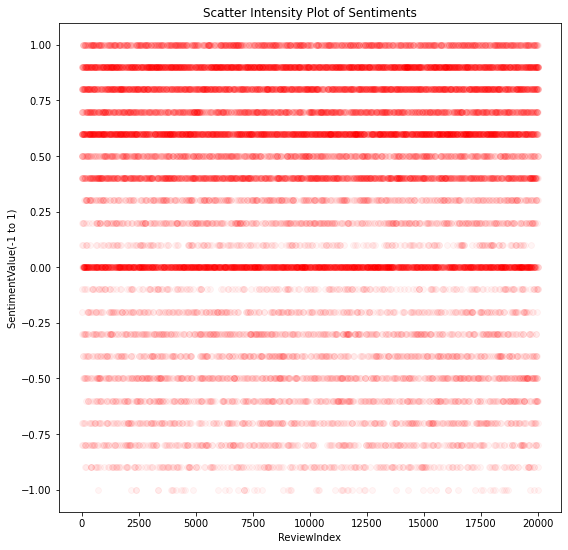

In [37]:
xaxis = []
for i in range(0,20000):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:20000]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()
# Observation the general plot is towards positive and neutral area

In [38]:
product_name_20k = []
for item in temp_data["Product Name"]:
    if (item in product_name_20k):
        continue
    else:
        product_name_20k.append(item)

In [39]:
len(product_name_20k)

2251

In [40]:
brands_temp = []
for item in temp_data["Brand Name"]:
    if (item in brands_temp):
        continue
    else:
        brands_temp.append(item)
len(brands_temp)

221

In [41]:
testing2 = pd.pivot_table(temp_data,index=['Brand Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                                   mean               \
           Rating Review Votes SENTIMENT_VALUE    Rating Review Votes   
Brand Name                                                              
Samsung     14820         6323           15027  3.980661     1.698362   
BLU         13601         3120           14144  3.811939     0.874439   
Apple       13388         7058           13436  3.928404     2.071009   
LG           5137         1306            5293  3.839312     0.976084   
BlackBerry   3758         1313            3666  3.731877     1.303873   
Nokia        3409         1541            3602  3.766851     1.702762   
Motorola     3113         1281            3203  3.867081     1.591304   
HTC          2482          760            2777  3.409341     1.043956   
CNPGD        2209         1248            2617  3.072323     1.735744   
OtterBox     2169          168            2088  4.500000     0.348548   

                            
           SENTIMENT_VALUE  
Brand Name                  
Samsung           4.036261  
BLU               3.964126  
Apple             3.942488  
LG                3.955904  
BlackBerry        3.640516  
Nokia             3.980110  
Motorola          3.978882  
HTC               3.814560  
CNPGD             3.639777  
OtterBox          4.331950

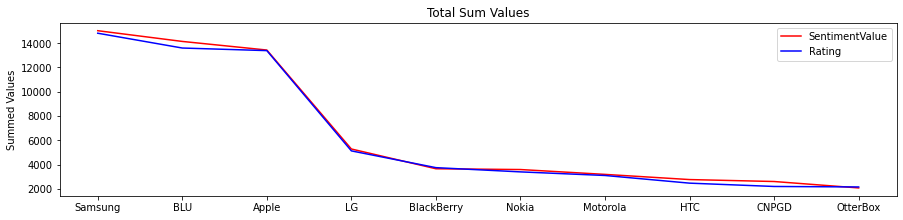

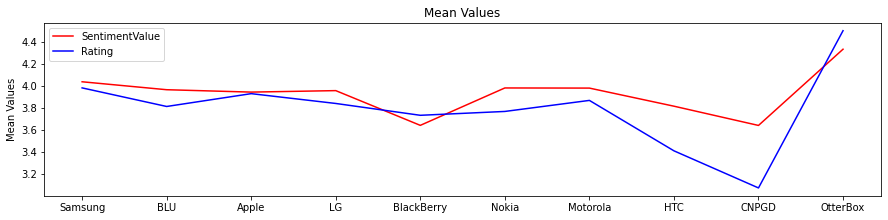

In [42]:
import pylab

names = testing2.index[:10]
y = testing2['sum', 'SENTIMENT_VALUE'][:10]
y2 = testing2['sum', 'Rating'][:10]



pylab.figure(figsize=(15,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Rating'])

y_new = testing2['mean', 'SENTIMENT_VALUE'][:10]
y2_new = testing2['mean', 'Rating'][:10]



pylab.figure(figsize=(15,7))


pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Rating'])


pylab.show()

In [43]:
samsung = []
blu = []
apple = []
lg = []
nokia = []



for i in range(0,20000):
    score = all_sent_values[i]
    brand = temp_data['Brand Name'].iloc[i]
    if (brand == 'Samsung'):
        samsung.append(score)
    elif (brand == 'BLU'):
        blu.append(score)
    elif (brand == 'Apple'):
        apple.append(score)
    elif (brand == 'LG'):
        lg.append(score)
    elif (brand == 'Nokia'):
        nokia.append(score)
    else:
        continue

In [44]:
list_of_brands = [samsung, blu, apple,lg,nokia]
name_of_brands = ['Samsung', 'BLU', 'Apple', 'LG', 'Nokia']

In [59]:
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,800)
    
    #pylab.xticks(x)
    pylab.ylabel('Sentiment')
    pylab.title(name)
    #pylab.plot(x,brand,"ro", alpha = 0.2)
    pylab.plot(x, brand[:800], color="indigo", linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

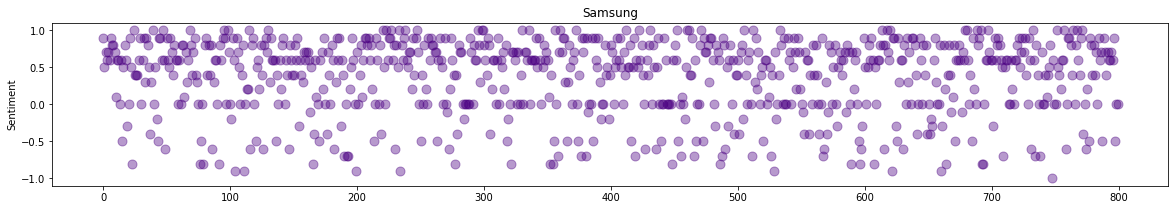

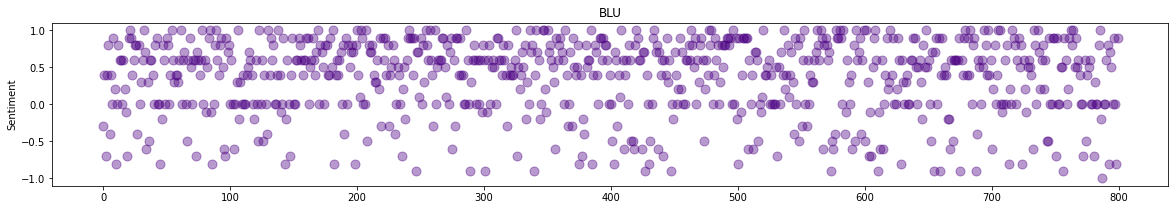

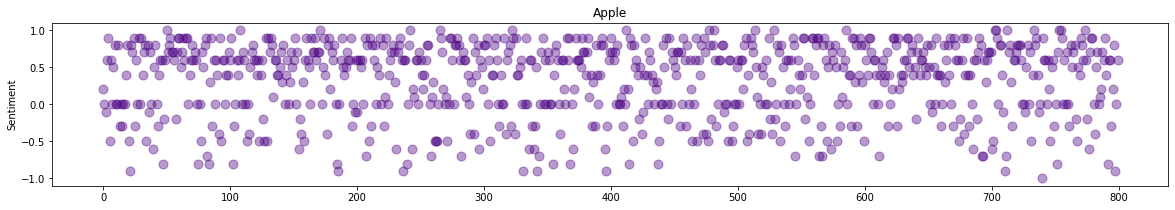

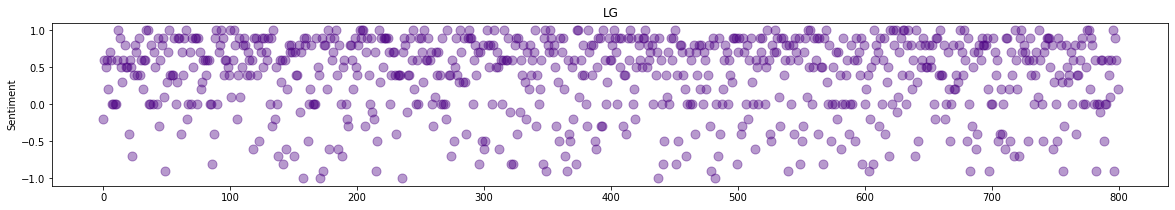

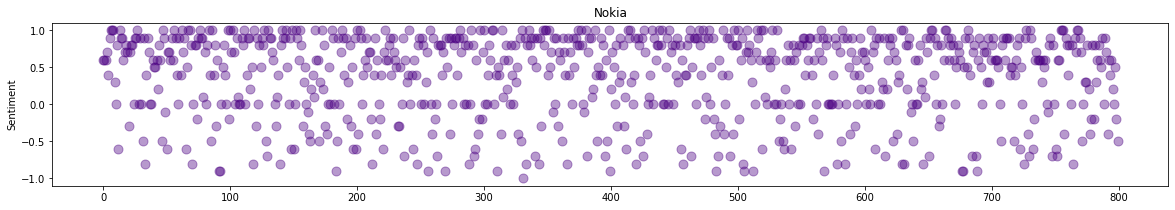

In [60]:
for i in range(0,len(list_of_brands)):
    plot_brand(list_of_brands[i],name_of_brands[i])